In [70]:
import os
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [72]:
path = r"C:\Users\lalas\Desktop\Left_wrist_motionbert_g.csv"
df = pd.read_csv(path)
np_array = df.to_numpy()
np.save(os.path.join("C:/Users/lalas/Desktop/", "Left_wrist_motionbert_g.npy"), np_array)

In [24]:
path = r"C:\Users\lalas\Downloads\left_wrist_groundtruth.csv"
df = pd.read_csv(path)
np_array = df.to_numpy()
np.save(os.path.join("C:/Users/lalas/Desktop/", "Left_wrist_gt.npy"), np_array)

In [73]:
path = r"C:\Users\lalas\Desktop\Left_wrist_OSX_g.csv"
df = pd.read_csv(path)
np_array = df.to_numpy()
np.save(os.path.join("C:/Users/lalas/Desktop/", "Left_wrist_OSX_g.npy"), np_array)

In [74]:
x = np.load("C:/Users/lalas/Desktop/Left_wrist_motionbert.npy")
print(x.shape)
data_mb = x[:,1:4]
x = np.load("C:/Users/lalas/Desktop/Left_wrist_motionbert_g.npy")
print(x.shape)
data_mb_g = x[:,1:4]

(901, 7)
(901, 7)


In [75]:
x_n = np.load("C:/Users/lalas/Desktop/Left_wrist_OSX.npy")
print(x_n.shape)
data_osx = x_n[:,1:4]
x_n = np.load("C:/Users/lalas/Desktop/Left_wrist_OSX_g.npy")
print(x_n.shape)
data_osx_g = x_n[:,1:4]

(901, 7)
(901, 7)


In [76]:
x_g = np.load("C:/Users/lalas/Desktop/Left_wrist_gt.npy")
print(x_g.shape)
data_gt = x_g[:,1:4]
print(data_gt.shape)

(1999, 11)
(1999, 3)


In [17]:
original = np.load("C:/Users/lalas/Documents/GitHub/vi2imu_code/data/openpack/raw/left_right_IMU_U0201_S0100.npy",allow_pickle=True)
original_r = original[:,1:4]
new_indices = np.linspace(0, data.shape[0] - 1, original_r.shape[0])
interpolated_functions = [interp1d(np.arange(data.shape[0]), data[:, i], kind='cubic') for i in range(data.shape[1])]
interpolated_columns = [func(new_indices) for func in interpolated_functions]
interpolated_array = np.column_stack(interpolated_columns)
print(interpolated_array.shape)

(35546, 3)


In [64]:
new_indices = np.linspace(0, data_r.shape[0] - 1, original_r.shape[0])
interpolated_functions = [interp1d(np.arange(data_r.shape[0]), data_r[:, i], kind='cubic') for i in range(data_r.shape[1])]
interpolated_columns = [func(new_indices) for func in interpolated_functions]
interpolated_array_r = np.column_stack(interpolated_columns)
print(interpolated_array_r.shape)

(35546, 3)


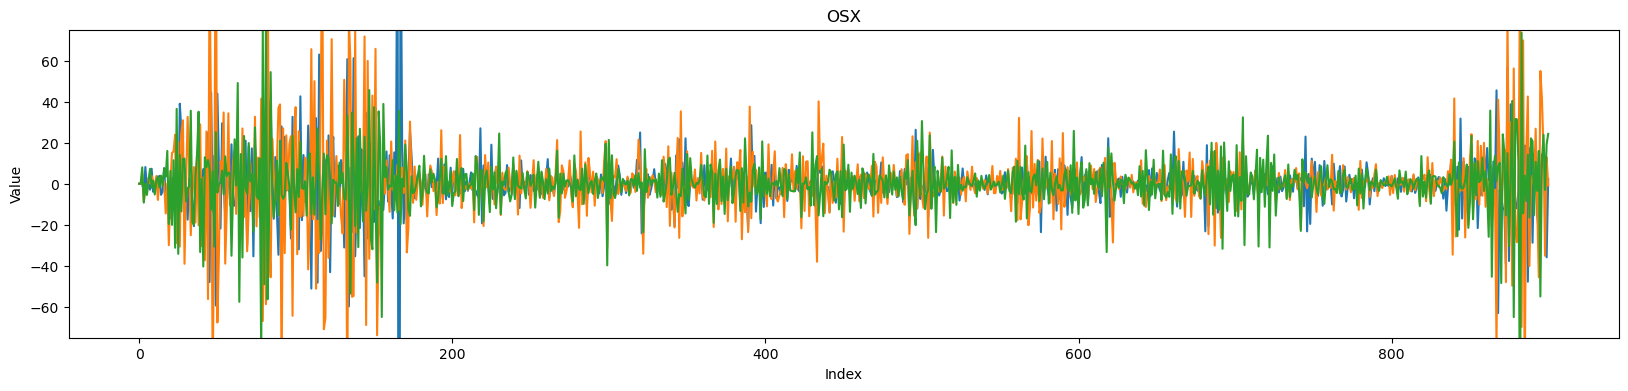

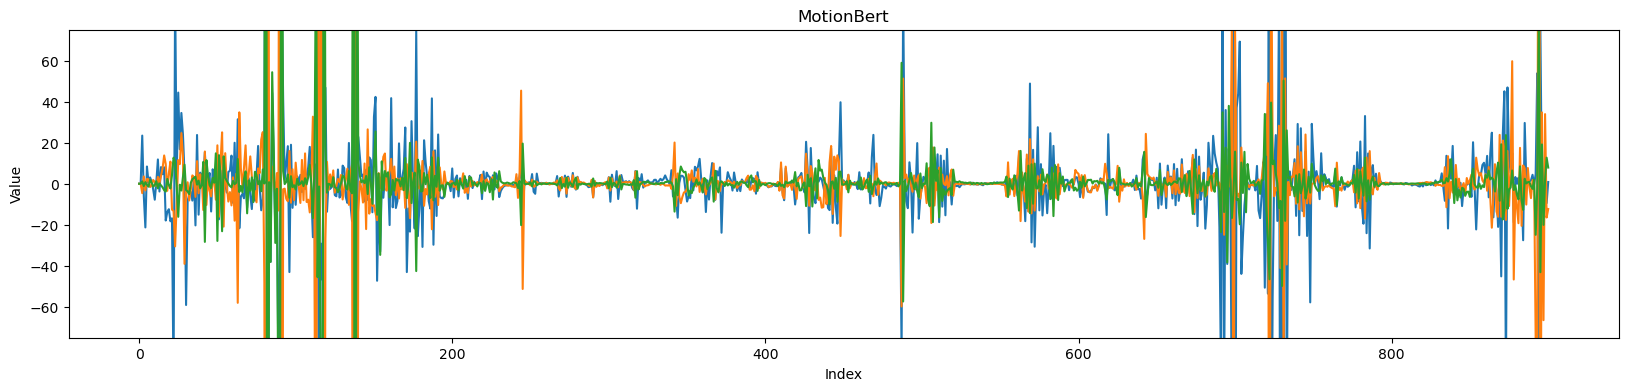

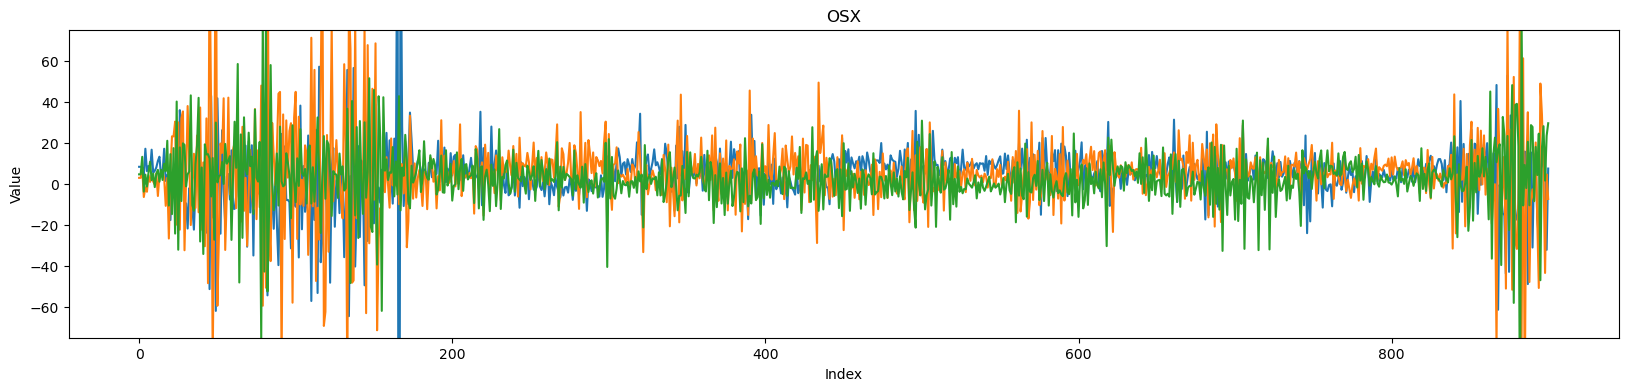

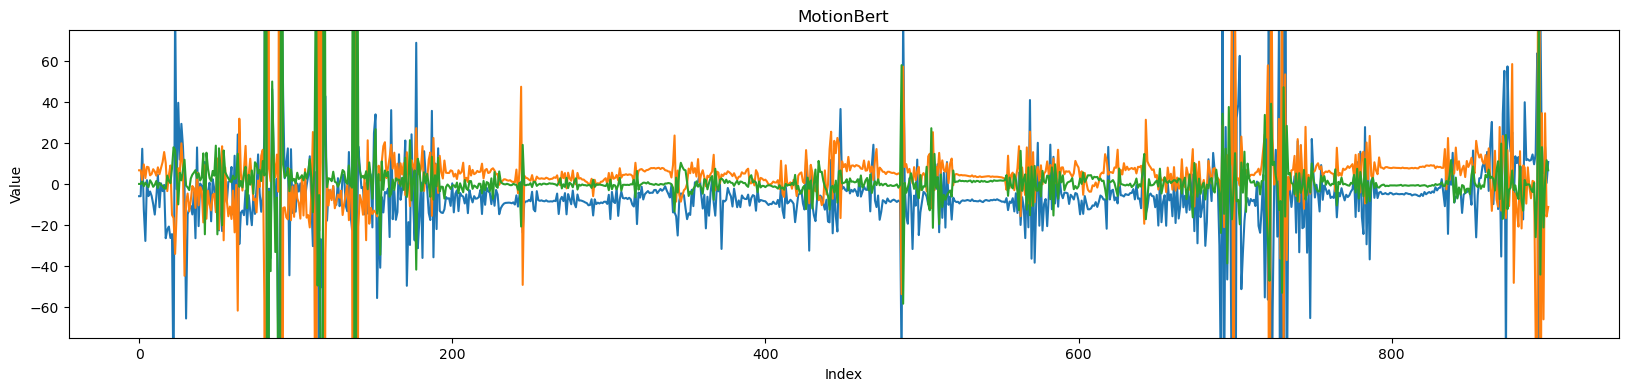

In [79]:
plt.figure(figsize=(20, 4))

plt.plot(data_osx[0:, 0])
plt.plot(data_osx[0:, 1])
plt.plot(data_osx[0:, 2])
#plt.plot(data_osx[0:, 0]+ data_osx[0:, 1]+data_osx[0:, 2])
plt.title('OSX')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(-75, 75)
plt.show()

plt.figure(figsize=(20, 4))
plt.plot(data_mb[0:, 0])
plt.plot(data_mb[0:, 1])
plt.plot(data_mb[0:, 2])
#plt.plot(data_mb[0:, 0]+ data_mb[0:, 1]+data_mb[0:, 2])
plt.title('MotionBert')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(-75, 75)
plt.show()

plt.figure(figsize=(20, 4))
plt.plot(data_osx_g[0:, 0])
plt.plot(data_osx_g[0:, 1])
plt.plot(data_osx_g[0:, 2])
#plt.plot(data_osx[0:, 0]+ data_osx[0:, 1]+data_osx[0:, 2])
plt.title('OSX')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(-75, 75)
plt.show()

plt.figure(figsize=(20, 4))
plt.plot(data_mb_g[0:, 0])
plt.plot(data_mb_g[0:, 1])
plt.plot(data_mb_g[0:, 2])
#plt.plot(data_mb[0:, 0]+ data_mb[0:, 1]+data_mb[0:, 2])
plt.title('MotionBert')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(-75, 75)
plt.show()


In [37]:
def min_max_scale(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    scaled_arr = (arr - min_val) / (max_val - min_val)
    return scaled_arr

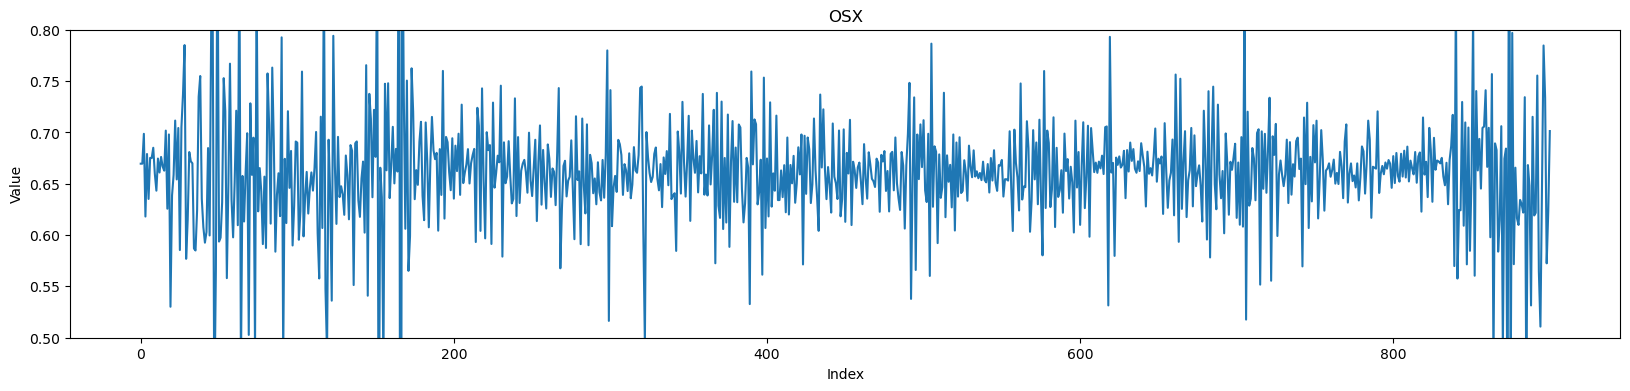

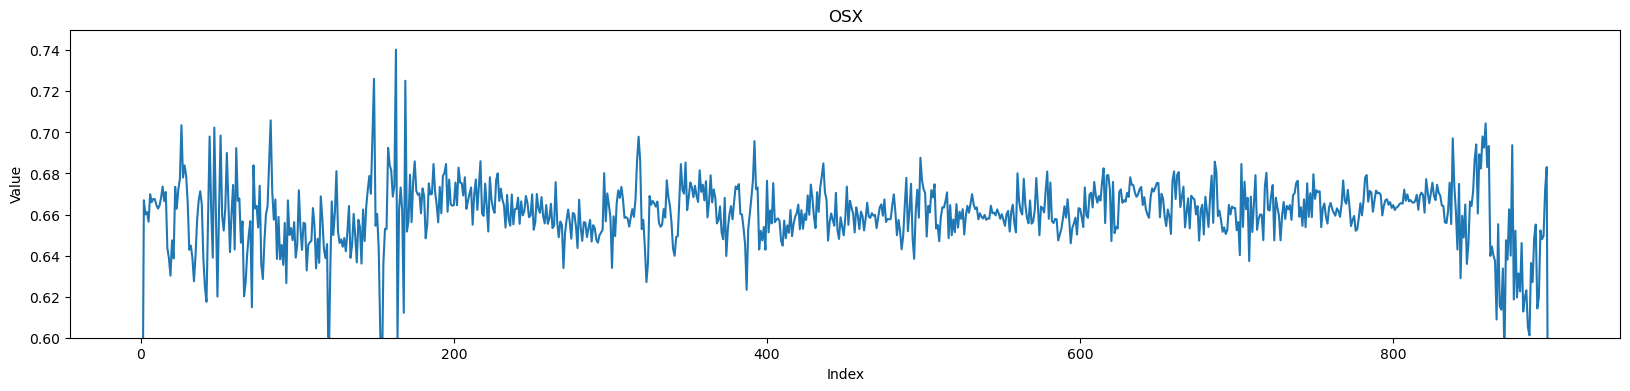

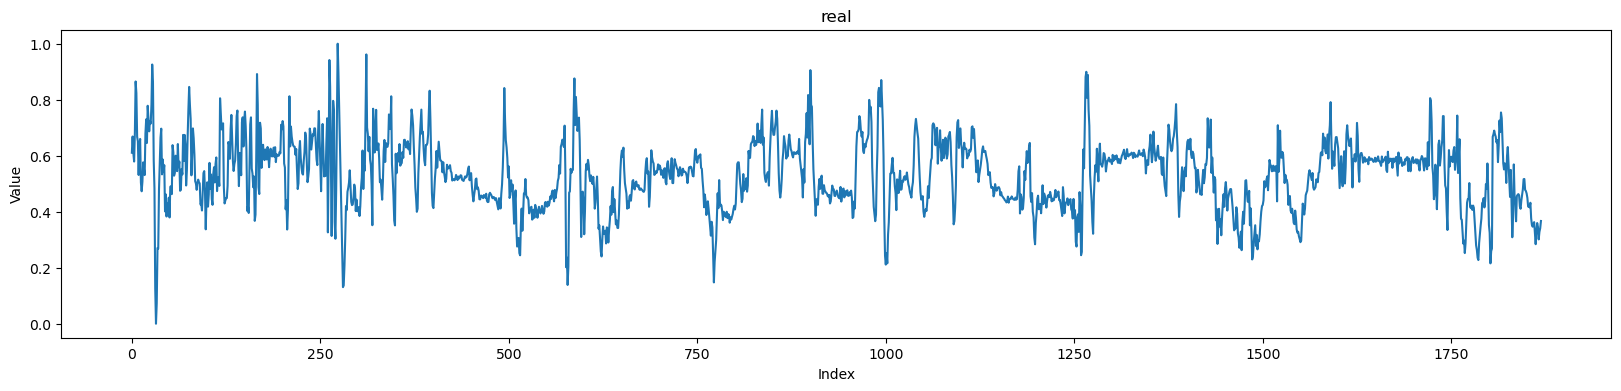

In [98]:
def moving_average(array, window_size):
    kernel = np.ones(window_size) / window_size
    smoothed_array = np.convolve(array, kernel, mode='same')
    return smoothed_array

window_size = 5

plt.figure(figsize=(20, 4))
data_osx = np.clip(data_osx_g, -75, 75)
scaled_arr_osx = min_max_scale(data_osx_g[0:, 0]+ data_osx_g[0:, 1]+data_osx_g[0:, 2])
plt.plot(scaled_arr_osx)
plt.title('OSX')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0.5, 0.8)
plt.show()


plt.figure(figsize=(20, 4))
smmoth_scaled_arr_osx = moving_average(scaled_arr_osx, window_size)
plt.plot(smmoth_scaled_arr_osx)
plt.title('OSX')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0.6, 0.75)
plt.show()


plt.figure(figsize=(20, 4))
scaled_arr_gt = min_max_scale(data_gt[0:1870, 0]+ data_gt[0:1870, 1]+data_gt[0:1870, 2])
plt.plot(scaled_arr_gt)
plt.title('real')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [93]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def remove_gravity(acceleration, orientation_quaternion):
    
    gravity_world_frame = np.array([0, 0, -1])  # Gravity vector in world frame
    orientation_quaternion = np.array(orientation_quaternion)  
    orientation_rotation = R.from_quat(orientation_quaternion)
    gravity_sensor_frame_rotated = orientation_rotation.apply(gravity_world_frame)

    linear_acceleration = acceleration - gravity_sensor_frame_rotated
    return linear_acceleration

In [94]:
ori = x_g[:,7:11]

In [95]:
linear_acceleration = remove_gravity(data_gt, ori)

In [96]:
linear_acceleration.shape

(1999, 3)

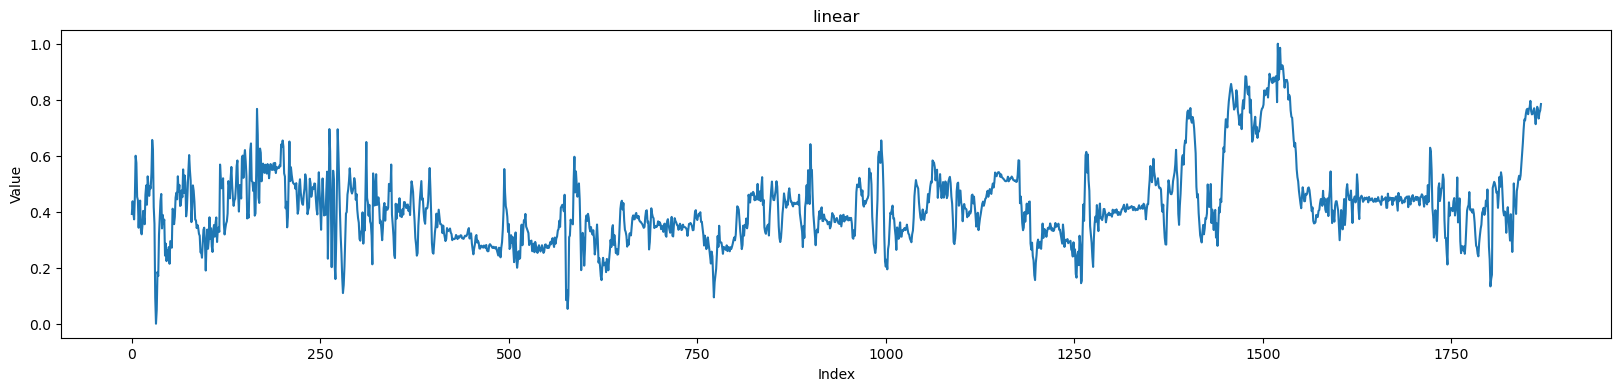

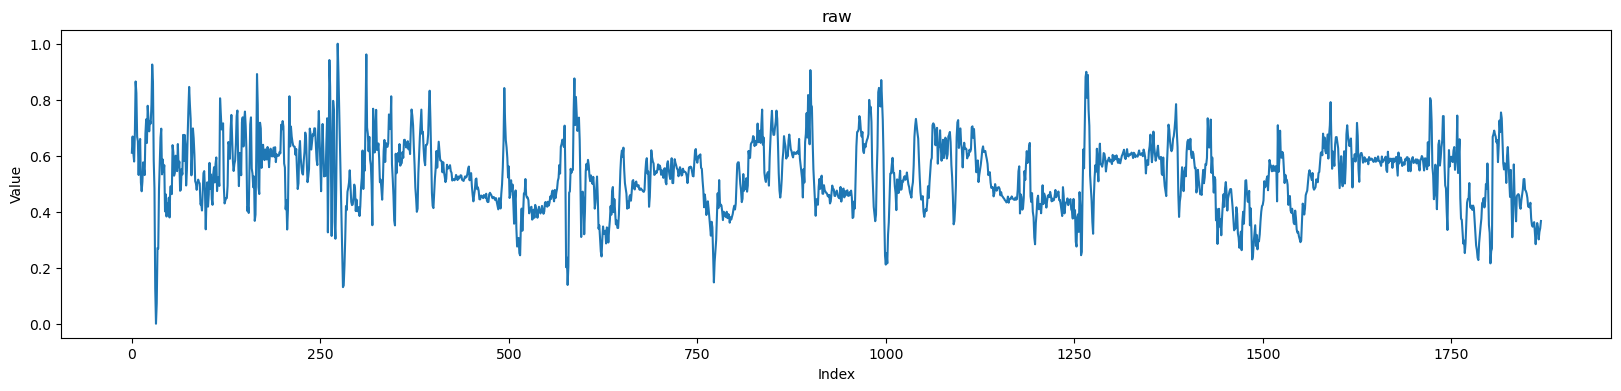

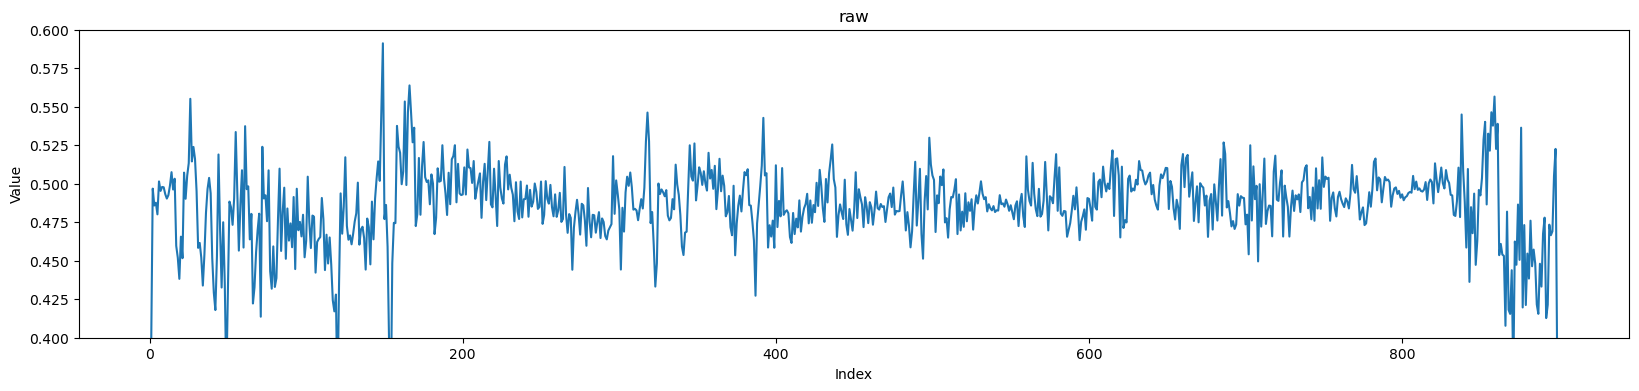

In [109]:
plt.figure(figsize=(20, 4))
scaled_arr_osx = min_max_scale(linear_acceleration[0:1870, 0]+ linear_acceleration[0:1870, 1]+linear_acceleration[0:1870, 2])
plt.plot(scaled_arr_osx)
plt.title('linear')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(20, 4))
scaled_arr_gt = min_max_scale(data_gt[0:1870, 0]+ data_gt[0:1870, 1]+data_gt[0:1870, 2])
plt.plot(scaled_arr_gt)
plt.title('raw')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(20, 4))
data_osx = np.clip(data_osx, -75, 75)
scaled_arr_osx_n = min_max_scale(data_osx[0:, 0]+ data_osx[0:, 1]+data_osx[0:, 2])
smooth_scaled_arr_osx = moving_average(scaled_arr_osx_n, 5)
plt.plot(smooth_scaled_arr_osx)
plt.title('raw')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0.4, 0.6)
plt.show()
